# 학습 내용
2. 텍스트 요약(Text Summarization)
    - 텍스트 요약 방법인 추출적 요약(Extractive Summarization)과 추상적 요약(Abstractive Summarization)에 대해서 알아봅니다.

3. 인공 신경망으로 텍스트 요약 훈련시키기
    - seq2seq 모델에 대한 개요와 구조 그리고 요소들에 대해서 알아봅니다.

4. 데이터 준비하기
    - Kaggle에서 제공하는 아마존 리뷰 데이터셋을 다운받고, 데이터를 확인해 봅니다.

5. ~ 7 데이터 전처리하기
    - 불용어 제거, 정규화, 정수인코딩 등의 데이터 전처리 과정을 코드로 구현합니다.

8. 모델 설계하기
    - 인코더와 디코더, 어텐셔을 설계하고 코드로 구현합니다.

9. 모델 훈련하기
    - EarlyStopping에 대해서 알아보고, 이를 적용하여 모델을 학습합니다.

10. 인퍼런스 모델 구현하기
    - 정수 인덱스 행렬로 나온 결과값을 실제 데이터로 복원하는 인퍼런스 모델을 코드로 구현합니다.

11. 모델 테스트하기
    - 모델을 통해 얻은 요약문과 실제 요약문을 비교해 봅니다.

12. 추출적 요약 해보기
    - summa 패키지를 사용하여 추출적 요약(Extractive Summarization)을 해봅니다.


# 학습 목표
- Extractive/Abstractive summarization 이해할 수 있습니다.
- 단어장 크기를 줄이는 다양한 text normalization 적용할 수 있습니다.
- seq2seq의 성능을 Up시키는 Attention Mechanism 적용할 수 있습니다.

# 2. Text Summarization이란?
- 긴 문서에서 핵심 주제만으로 구성된 요약 문장으로 변환
- 다만 요약하는 과정에서 손실 발생은 최소화 되어야 한다.

---
크게 두 가지 개념이 있다.
## 2-1. Extractive Summarization
- 원문에서 그대로 문장들을 추출해서 요약하는 방식
- TextRank와 같은 전통적인 ML 방식의 알고리즘이 이에 속함
- 어느 문장이 핵심문장인지 판별한다는 점에서 크게 Text Classification 문제

## 2-2. Abstractive Summarization
- 원문으로부터 내용이 요약된 새로운 문장을 생성해내는 방식
- 즉, 원문에는 원래 없던 문장일 수 있다.
- NLG(Natural Language Generation) 영역이다.

# 3. 인공 신경망으로 텍스트 요약 훈련시키기

## 3-1. Seq2Seq
- seq2seq : 두 개의 RNN계열의 아키텍처를 사용하여, 입력 seq으로부터 출력 seq을 생성해 내는 NLG model.
    - 결국 Encoder의 마지막 hidden state가 사실상 Context Vector
    - RNN계열이기에, 그냥 RNN을 사용한다면 이미지에서 중앙에 Context Vector에는 hidden state 정보만 담기면 됨
    - LSTM은 hs 외의 cell state도 존재하기에 이또한 Context vector에 담겨야 한다.
        - 여기서 rnn계열 layer가 여러개여도 마지막 layer의 hs만 해당됨 

- 입력과 출력할 때, Special Token이 사용되는데, 이는 어디부터 시작하는지 또는 어디까지 출력을 해야하는지 알려준다.
    - \<SOS> : start Token
    - \<EOS> : End Token
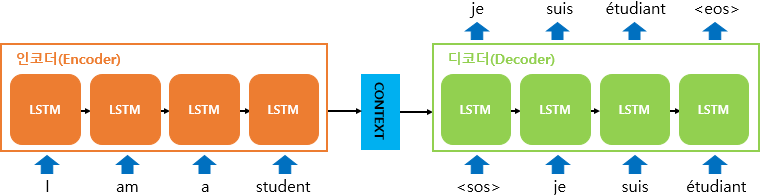

- 아무래도 출력 시에는 softmax를 통해 가장 높은 값을 출력하게 된다.
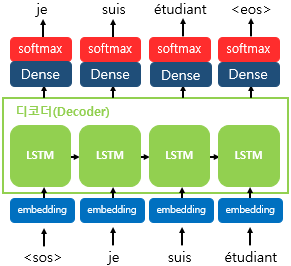

## 3-2. Attention Mechanism을 통한 새로운 Context Vector 사용하기
### 3-2.1 Attention Mechanism이란
- 단순하게 RNN 계열의 seq2seq는 rnn의 문제가 포함되어있다.
    - Context Vector 하나로 모든 정보를 압축하려고 보니 정보 손실이 남
    - rnn의 문제인 Vanishing gradient 문제가 존재
- 기본적인 아이디어
    - Decoder에서 출력 단어를 예측하는 매 time step마다, Encoder의 전체 입력 문장을 다시 한 번 참고
    - 다만 전체 입력 문장을 전부 다 동일한 비율이 아니라, 해당 time step에서 예측해야할 단어와 연관이 있는 단어를 좀 더 집중(attention)해서 본다

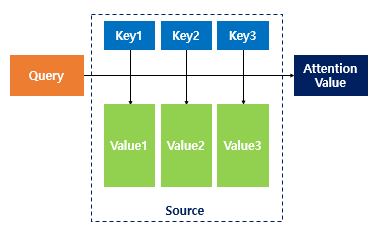

- 수식 : Attention(Q, K, V) = Attention Value
- Q에 대해서 모든 key와의 유사도를 각각 구해줌
- 그 유사도를 key와 매핑되어있는 각각의 V에 반영
- 유사도가 반영된 V를 모두 더해서 출력하면, 그게 Attention value
    - Q = Query : t 시점의 디코더 셀에서의 은닉 상태
    - K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
    - V = Values : 모든 시점의 인코더 셀의 은닉 상태들

### 3-2.2 새로운 Context Vector 사용하기
위 개념을 seq2seq에 적용해보자
- 기존 seq2seq은 encoder의 마지막 hs가 context vec이다.
- 여기서는 encoder의 모든 step의 hs의 정보가 context vector에 반영하게 하는 것
    - 예시 : 0.2h_1 + 0.3h_2 + 0.1h_3 + 0.15h_4 + 0.25h_5
    - 다만 Decoder의 각 step마다 이 가중치는 변경됨
      - 여기서 rnn계열 layer가 여러개여도 마지막 layer의 hs만 해당됨
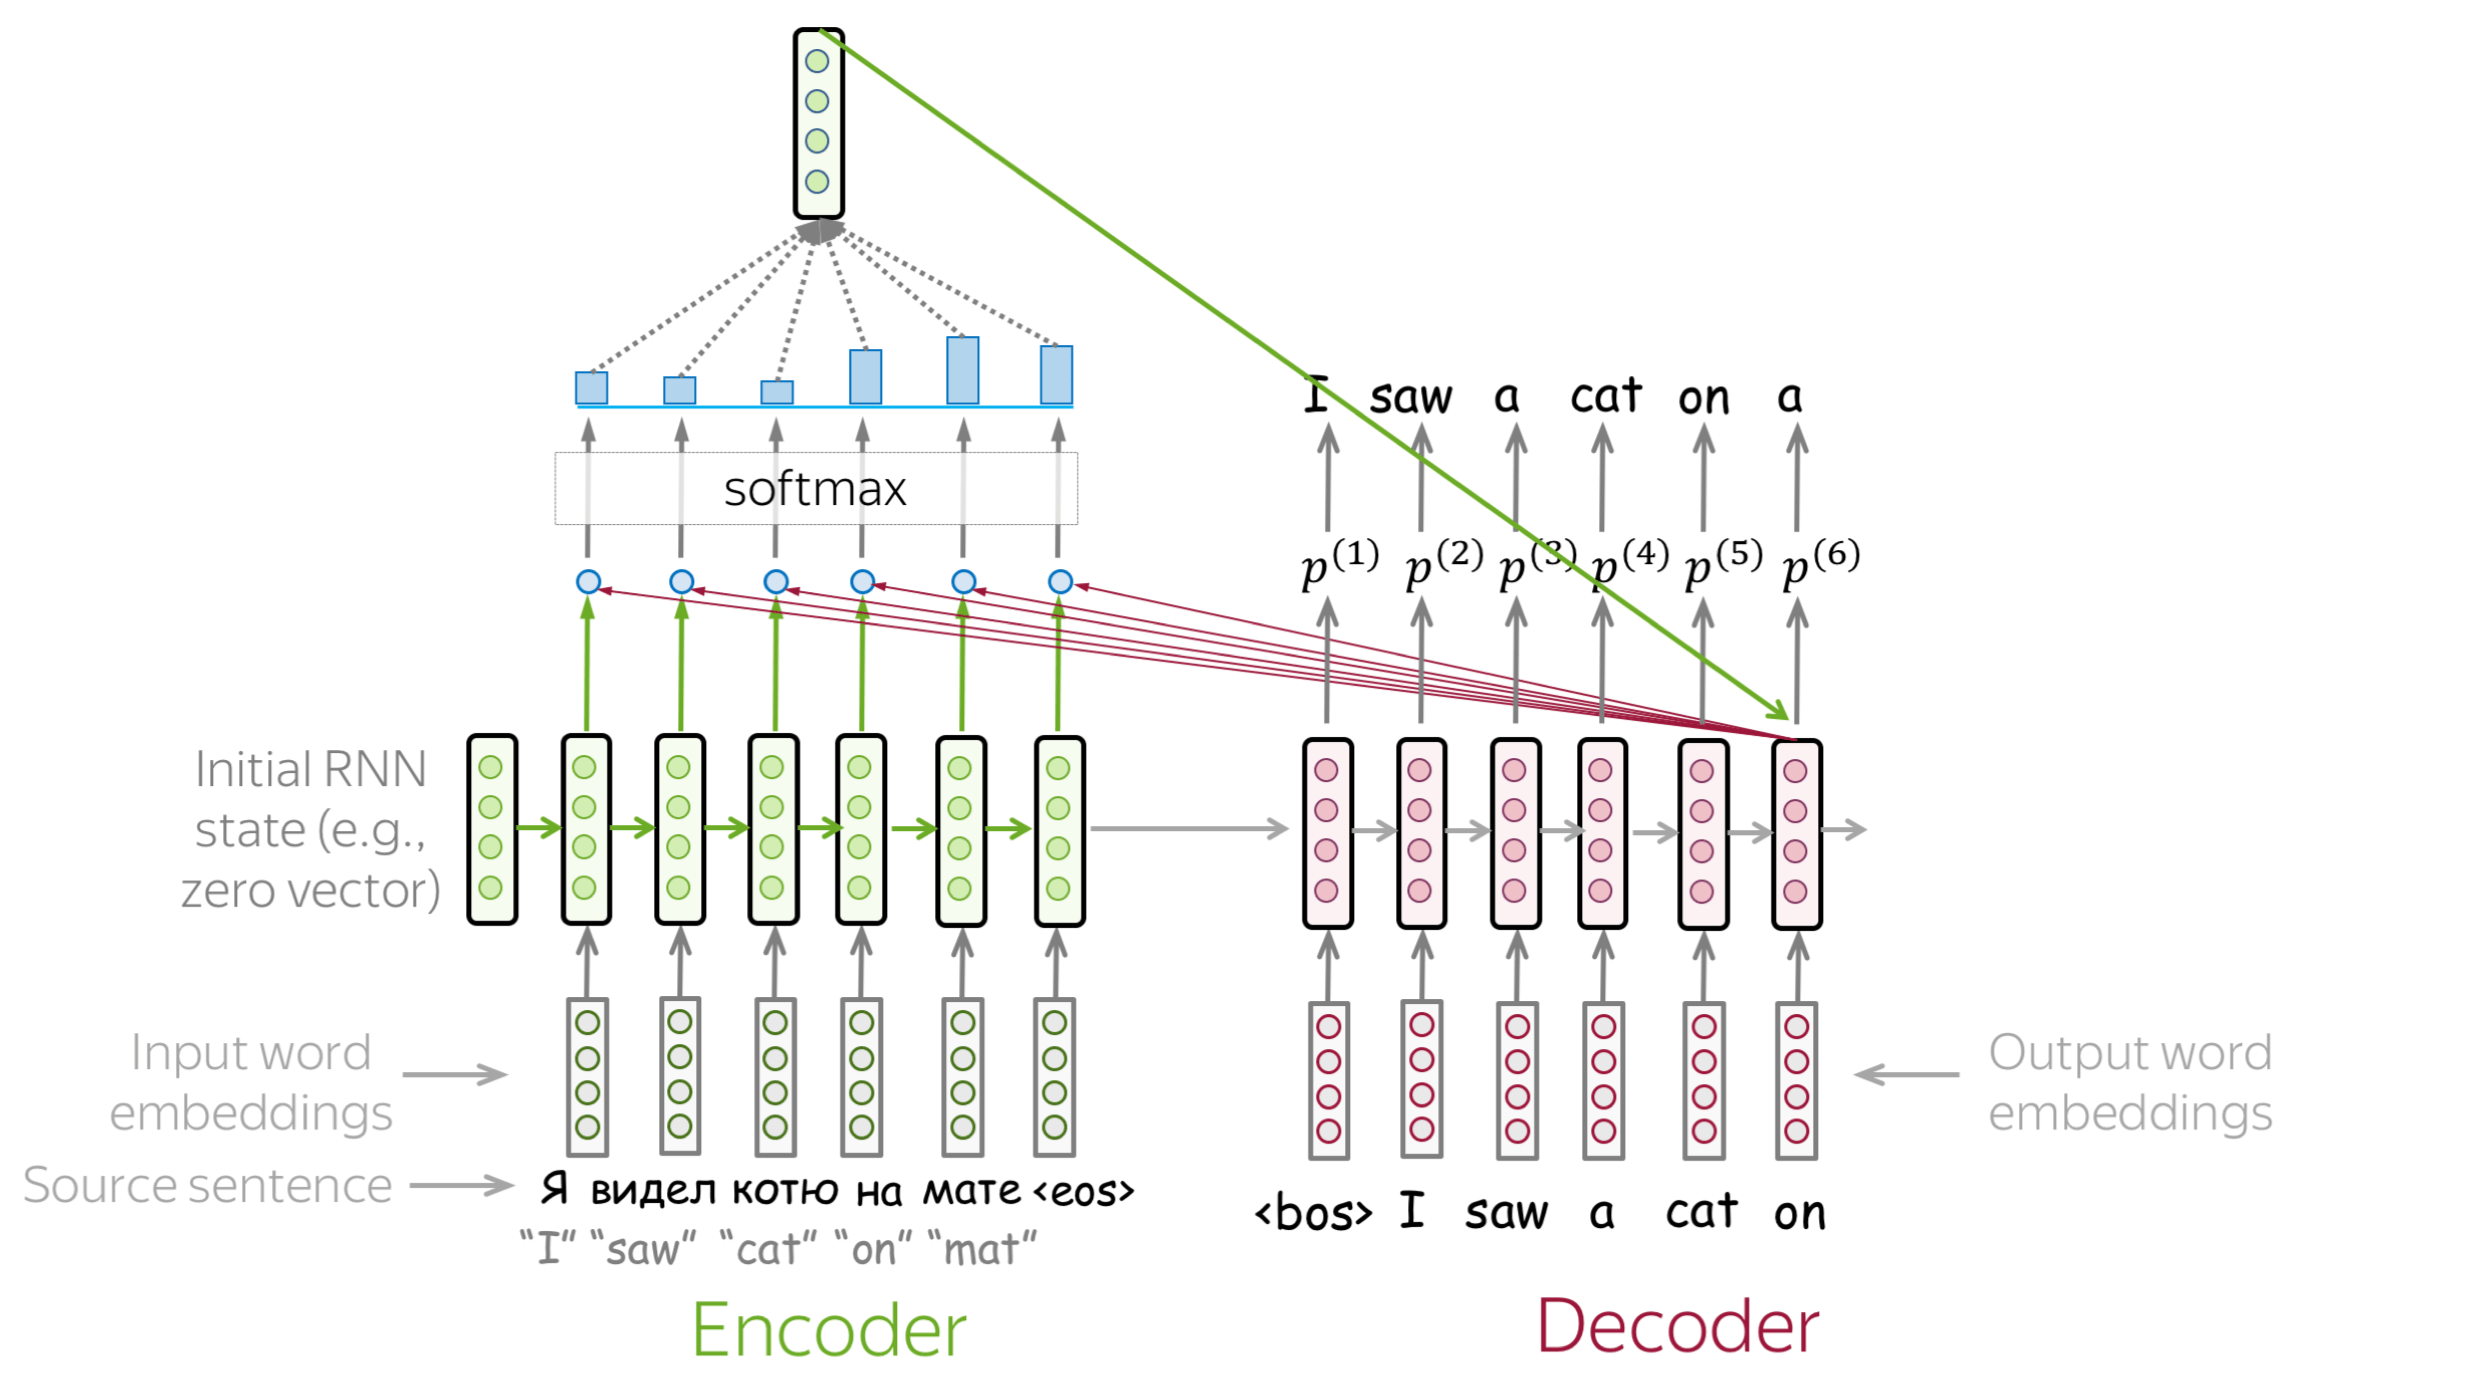

# 4. 데이터 준비하기

In [ ]:
#!wget https://d3s0tskafalll9.cloudfront.net/media/documents/Reviews.csv.zip
#!mv Reviews.csv.zip ~/work/project/Exploration/Quest06/Amazon/data

In [2]:
#!cp ~/work/news_summarization/data/Reviews.csv ~/work/project/Exploration/Quest06/Amazon/data

In [4]:
#!pip install nltk beautifulsoup4 lxml
# beautifulsoup4 : 문서를 파싱 하는데 사용하는 패키지
# lxml : XML(eXtensible Markup Language) 파일을 파싱하고 생성
# lxml을 위해서 커널 재시작 해야할 거임

In [5]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

import torch
from collections import Counter

import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
data = pd.read_csv("Amazon/data/Reviews.csv", nrows=100000) # 10만 개의 샘플만 사용하기
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 100000


In [7]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# 우리가 볼 col로는 Text와 Summary
data = data[['Text', 'Summary']] 
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,Text,Summary
80263,Incredibly disappointed with this product. Tas...,"Watery, chemical taste"
70248,A powdered tea mix that's individually packed ...,Excellent flavor
68962,I can't believe some people actually manage to...,New Fan
20309,I have two Kitties and they love their food. I...,Looks Fantastic!
93501,This bar is VERY chewy and can make your jaw s...,Chewy and tasty!
21186,I was kinda skeptic about this green chews. Tu...,best dental chew
18400,Maldon is my go-to salt for finishing at the t...,AMAZING finishing salt-Great price
35295,I'm a big fan of Illy Issimo Cappuccino for a ...,Love it!
17451,I love Keurig coffee. I can't always get the ...,GETTING MORE
15612,We have been using these treats for a very lon...,Gimborn Liver Bits Treats


# 5. 데이터 Preprocessing

## 5-1. 중복 샘플과 NULL 값이 존재하는 샘플 제거

In [9]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique(), '\n')

# inplace=True 내부적으로 변경됨. 굳이 변수 선언 할 필요 없지만 사용에 주의
# Text자체 중복일 경우 삭제. Summary는 중복 허용
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)), '\n')

# null 값이 있는지
print("Null 존재하는지 \n", data.isnull().sum(), '\n')

# DF에서 NaN 값이 포함된 row을 제거 (axis=0 → 행 단위)
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348 

전체 샘플수 : 88426 

Null 존재하는지 
 Text       0
Summary    1
dtype: int64 

전체 샘플수 : 88425


## 5-2. 텍스트 정규화와 불용어 제거
- 영어에서는 it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현, 그래서 통일
- 영어 정규화를 위해서는 [Stack Overflow에 있는 불용어](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python), [Wikipidia에 있는 불용어](https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions) 참고
- NLTK library에서는 영어에 대한 불용어를 따로 제공함

In [10]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [11]:
# NLTK에서는 영어에 대한 불용어를 따로 제공함
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "

In [12]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [13]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다.
clean_text = []

for sentence in data['Text']:
    clean_text.append(preprocess_sentence(sentence))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


In [14]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다.
clean_summary = []

for sentence in data['Summary']:
    clean_summary.append(preprocess_sentence(sentence, remove_stopwords=False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

/tmp/ipykernel_130/2804372948.py:4: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거


Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


In [15]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

# null 값이 있는지
print("Null 존재하는지 \n", data.isnull().sum(), '\n')

data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

Null 존재하는지 
 Text        0
Summary    70
dtype: int64 

전체 샘플수 : 88355


# 6. 훈련데이터와 테스트데이터 나누기
- 앞서 말했다시피, special token으로 시작과 끝을 정해줘야 함

## 6-1. 샘플의 최대 길이 정하기
- 우선 모델에 넣을 문장의 최대 길이를 정해보자
- 다양한? EDA로 통해 적절히 넣어보자

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
텍스트의 표준편차 길이 : 36.65963417006561
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352
텍스트의 표준편차 길이 : 2.4772265404174956


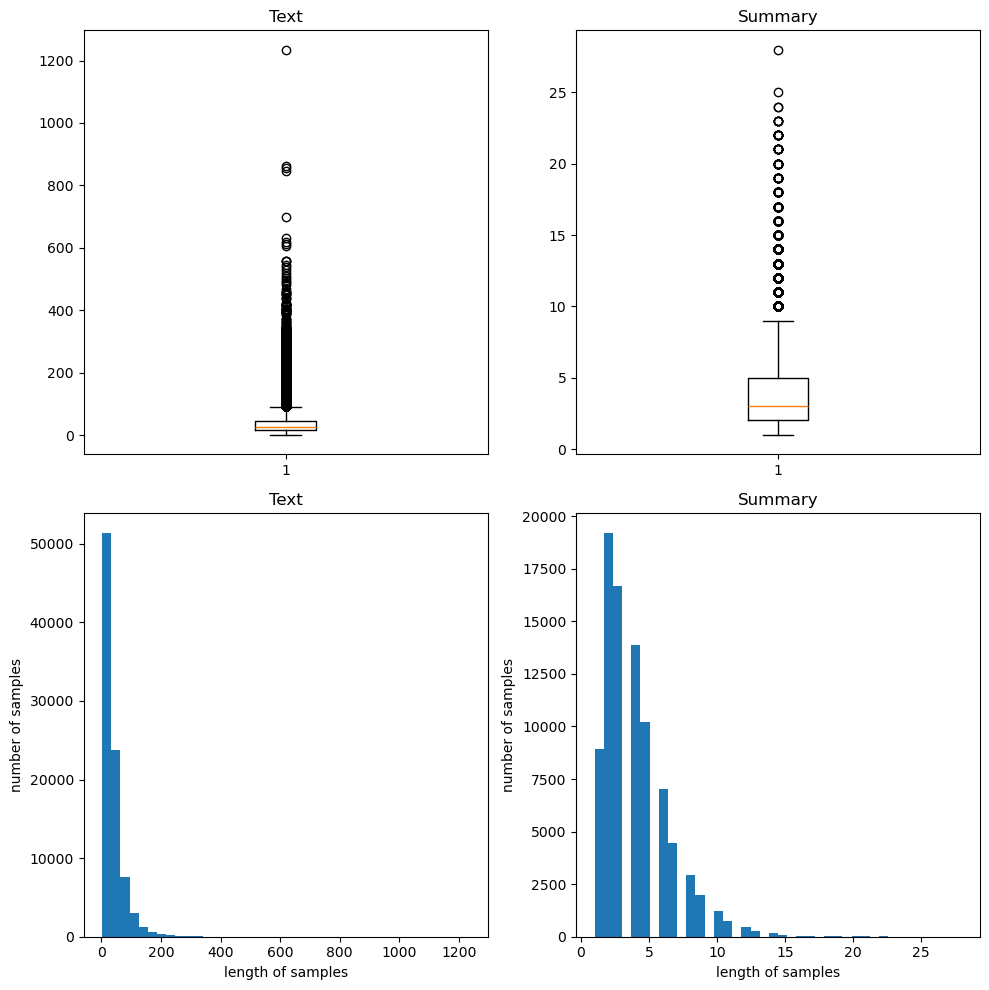

In [16]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('텍스트의 표준편차 길이 : {}'.format(np.std(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))
print('텍스트의 표준편차 길이 : {}'.format(np.std(summary_len)))

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(2,2,2)
plt.boxplot(summary_len)
plt.title('Summary')

plt.subplot(2,2,3)
plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.subplot(2,2,4)
plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.tight_layout()
plt.show()

In [17]:
# 평균 + 표준편차 * 2 로 진행
# 다만 우리가 다루는 차원의 길이가 소수점일수는 없으니 int로 과감히 자름
# 정답이 없음
text_max_len = int(np.mean(text_len) + np.std(text_len)*2)
summary_max_len = int(np.mean(summary_len) + np.std(summary_len)*2)

print(f'text 최대 길이 : {text_max_len}')
print(f'summary 최대 길이 : {summary_max_len}')

text 최대 길이 : 112
summary 최대 길이 : 8


In [23]:
# 이 또한 정답이 없음
def below_threshold_len(max_len, nested_list):
    """
    최대길이로 자른 sample의 비율은 어떤지
    """
    cnt = 0 
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 112 이하인 샘플의 비율: 0.9590855073283912
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [24]:
# 해당 실습에서는 최대길이로 자르는 것이 아니라
# 최대길이보다 긴건 제거하는 방식으로 진행
data = data[data.Text.apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data.Summary.apply(lambda x: len(x.split()) <= summary_max_len)]

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 80392


## 6-2. 시작 토큰과 종료 토큰 추가하기

In [25]:
data['decoder_input'] = data.Summary.apply(lambda x: "<SOS> " + x)
data['decoder_target'] = data.Summary.apply(lambda x: x + " <EOS>")

data[['decoder_input', 'decoder_target']].head(5)

,decoder_input,decoder_target
0,<SOS> good quality dog food,good quality dog food <EOS>
1,<SOS> not as advertised,not as advertised <EOS>
2,<SOS> delight says it all,delight says it all <EOS>
3,<SOS> cough medicine,cough medicine <EOS>
4,<SOS> great taffy,great taffy <EOS>


## 6-3. Sample 나누기

In [26]:
# 우선 DF에서 꺼내오기
encoder_input = np.array(data.Text) # 인코더의 입력
decoder_input = np.array(data.decoder_input) # 디코더의 입력
decoder_target = np.array(data.decoder_target) # 디코더의 레이블

# train과 test를 나누기 위한 index 랜덤 지정 후 섞기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

# 나누기 
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 세보기 :', n_of_val, '\n')

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

테스트 데이터의 수 세보기 : 16078 

훈련 데이터의 개수 : 64314
훈련 레이블의 개수 : 64314
테스트 데이터의 개수 : 16078
테스트 레이블의 개수 : 16078


# 7. 정수 인코딩

## 7-1. Vocabulary 만들기 및 정수 인코딩

In [27]:
# 정수 인코딩 하기전에 우선 Voca 만들기
def tokenizer(text): 
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)  # 특수문자 제거
    return text.split()  # 공백 기준 토큰화

def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}  # 패딩과 UNK 토큰 추가
    word_counter = Counter()

    for text in texts:
        word_counter.update(tokenizer(text))  # 단어 빈도수 계산

    # 단어 집합 생성 (빈도가 높은 순서대로)
    for word, _ in word_counter.most_common():
        if word not in vocab:
            vocab[word] = len(vocab)

    return vocab

src_vocab = build_vocab(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
tar_vocab = build_vocab(decoder_input_train)

In [28]:
def k_rare_token(k, input_text):
    # 등장을 적게하는 희소한 token들은 제거하려고 한다.
    # threshold를 k번 미만으로 나온거는 제거한다. -> <UNK>가 되어버임
    threshold = k 
    
    # 단어 빈도수 계산
    word_counter = Counter()
    for text in input_text:
        word_counter.update(text.split())
    
    total_cnt = len(word_counter)  # 전체 단어 개수
    total_freq = sum(word_counter.values())  # 전체 단어 등장 횟수
    rare_cnt = sum(1 for count in word_counter.values() if count < threshold)  # 희귀 단어 개수
    rare_freq = sum(count for count in word_counter.values() if count < threshold)  # 희귀 단어 등장 횟수
    
    # 희귀 단어를 제외한 단어 사전 구축
    vocab = {"<PAD>": 0, "<UNK>": 1}  # 패딩 및 미등록 단어 추가
    word_index = {word: idx + 2 for idx, (word, count) in enumerate(word_counter.items()) if count >= threshold}
    
    print('단어 집합(vocabulary)의 크기 :', total_cnt)
    print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
    print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
    print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
    print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100, '\n')

k_rare_token(6, data.Text) # 난 5번 이하로 나온 것을 제거할 거다. - Text input에 대해 알아보기
k_rare_token(6, decoder_input_train) # 난 5번 이하로 나온 것을 제거할 거다. - Summary input에 대해 알아보기

단어 집합(vocabulary)의 크기 : 46586
등장 빈도가 5번 이하인 희귀 단어의 수: 33287
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13299
단어 집합에서 희귀 단어의 비율: 71.45279697763276
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.1054814331423115 

단어 집합(vocabulary)의 크기 : 12021
등장 빈도가 5번 이하인 희귀 단어의 수: 9189
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2832
단어 집합에서 희귀 단어의 비율: 76.4412278512603
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.265595047991311 



In [30]:
def build_limited_vocab(texts, vocab_size, tokenizer=tokenizer):
    vocab = {"<PAD>": 0, "<UNK>": 1}  # 패딩과 UNK 토큰 추가
    word_counter = Counter()

    for text in texts:
        word_counter.update(tokenizer(text))  # 단어 빈도수 계산

    # 빈도가 높은 상위 vocab_size - 2개 단어만 선택 (PAD, UNK 포함)
    for word, _ in word_counter.most_common(vocab_size - 2):
        vocab[word] = len(vocab)

    return vocab

# 대략 난 13000으로 두겠다 - 희귀 단어를 제외시킬 경우의 단어 집합의 크기 기준
src_vocab_size = 13000
src_vocab = build_limited_vocab(encoder_input_train, src_vocab_size)

tar_vocab_size = 2800
tar_vocab = build_limited_vocab(decoder_input_train + decoder_target_train, tar_vocab_size)

In [32]:
# 그럼 우리가 가진 데이터에서 Voca에 존재하지 않는 것은 이제 <UNK> 처리한다
def text_to_sequence(texts, vocab, tokenizer=tokenizer):
    sequences = []
    for text in texts:
        sequence = [vocab.get(word, vocab["<UNK>"]) for word in tokenizer(text)]
        sequences.append(sequence)
    return sequences

# 텍스트 데이터 정수 시퀀스로 변환
encoder_input_train_seq = text_to_sequence(encoder_input_train, src_vocab)
encoder_input_test_seq = text_to_sequence(encoder_input_test, src_vocab)

# 잘 진행되었는지 샘플 출력
print('Encoder(Text)')
print('input', encoder_input_train_seq[:3], '\n')

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train_seq = text_to_sequence(decoder_input_train, tar_vocab)
decoder_target_train_seq = text_to_sequence(decoder_target_train, tar_vocab)
decoder_input_test_seq = text_to_sequence(decoder_input_test, tar_vocab)
decoder_target_test_seq = text_to_sequence(decoder_target_test, tar_vocab)

# 잘 변환되었는지 확인
print('decoder(Summary)')
print('input ',decoder_input_train_seq[:3])
print('target ',decoder_target_train_seq[:3])

Encoder(Text)
input [[284, 481, 260, 149, 6743, 411, 420, 149, 5, 851, 459, 6743, 45, 94, 32, 449, 198, 320, 144, 258, 6743, 251, 40, 54, 718, 459], [166, 8, 22, 726, 69, 78, 1467, 212, 14, 69, 11, 23, 162, 241, 3489, 3, 371, 4595, 1570, 805, 6, 109], [23, 1667, 476, 92, 928, 133, 79, 634, 34, 3080, 9, 75, 38]] 

decoder(Summary)
input  [[2, 1519, 1], [2, 4, 6, 82, 8, 280], [2, 68, 68]]
target  [[1519, 1, 3], [4, 6, 82, 8, 280, 3], [68, 68, 3]]


In [33]:
# 혹여나 빈도 낮은 단어 제거하던 중에 sample이 empty해졌을수 있다.
# Summary부분인 decoder 부분이 특히 짧았기에, 그럴 가능성이 커보인다.
# decoder 부분은 시작이나 끝 token이 들어있기에, 길이가 1인 것은 사실상 비어있다고 봐야한다.

def get_drop_index(data_list, min_len=2):
    """문장 길이가 min_len 미만인 인덱스 목록 반환"""
    return [i for i, s in enumerate(data_list) if len(s) < min_len]

drop_train = get_drop_index(decoder_input_train)
drop_test = get_drop_index(decoder_input_test)

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test),'\n')

def drop_by_index(data_list, drop_idx):
    """drop_idx에 포함된 인덱스를 제외한 새 리스트 반환"""
    return [s for i, s in enumerate(data_list) if i not in drop_idx]
    
encoder_input_train = drop_by_index(encoder_input_train, drop_train)
decoder_input_train = drop_by_index(decoder_input_train, drop_train)
decoder_target_train = drop_by_index(decoder_target_train, drop_train)

encoder_input_test = drop_by_index(encoder_input_test, drop_test)
decoder_input_test = drop_by_index(decoder_input_test, drop_test)
decoder_target_test = drop_by_index(decoder_target_test, drop_test)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

# 다행이 존재하진 않았다.

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0 

훈련 데이터의 개수 : 64314
훈련 레이블의 개수 : 64314
테스트 데이터의 개수 : 16078
테스트 레이블의 개수 : 16078


## 7-2. Padding 하기

In [34]:
from torch.nn.utils.rnn import pad_sequence

# 텐서 변환 함수 (리스트 → PyTorch 텐서)
def convert_to_tensor(sequences):
    return [torch.tensor(seq, dtype=torch.long) for seq in sequences]

# 패딩 적용 함수 (PyTorch `pad_sequence()` 활용)
def pad_sequences_pytorch(sequences, maxlen, padding_value=0, padding_side='left'):
    sequences = convert_to_tensor(sequences)  # 리스트를 텐서로 변환
    padded_seqs = pad_sequence(sequences, batch_first=True, padding_value=padding_value,padding_side=padding_side)  # 패딩 적용
    return padded_seqs[:, :maxlen]  # maxlen 길이로 자르기 (최대 길이 초과 방지)

# 패딩 적용
encoder_input_train = pad_sequences_pytorch(encoder_input_train_seq, maxlen=text_max_len)
encoder_input_test = pad_sequences_pytorch(encoder_input_test_seq, maxlen=text_max_len)
decoder_input_train = pad_sequences_pytorch(decoder_input_train_seq, maxlen=summary_max_len)
decoder_target_train = pad_sequences_pytorch(decoder_target_train_seq, maxlen=summary_max_len)
decoder_input_test = pad_sequences_pytorch(decoder_input_test_seq, maxlen=summary_max_len)
decoder_target_test = pad_sequences_pytorch(decoder_target_test_seq, maxlen=summary_max_len)


# 8. modeling
- 우리는 모델 구조를 쌓을때, Encoder Decoder 개념이 있었다.
- 그렇기에 Encoder, Decoder class를 만들고 -> Seq2Seq 최종 class를 만들어야 한다.

## 8-1. Encoder, Decoder

In [35]:
import torch.nn as nn
import torch.nn.functional as F

# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
class Encoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers=3, dropout=0.4):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(
            embedding_dim, hidden_size, num_layers=num_layers,
            dropout=dropout, batch_first=True
        )

    def forward(self, x): # 인코더의 임베딩 층
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)  # LSTM 실행
        return output, hidden, cell

# 인코더 모델 생성
encoder = Encoder(src_vocab_size, embedding_dim, hidden_size, num_layers=3, dropout=0.4)

In [36]:
# 디코더 설계
class Decoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, dropout=0.4, num_layers=3):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(
            embedding_dim, hidden_size, num_layers=num_layers, dropout=dropout,
            batch_first=True
        )

    def forward(self, x, hidden, cell): # 디코더의 임베딩 층
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))  # 초기 상태를 인코더에서 전달받음
        return output, hidden, cell

# 디코더 모델 생성
decoder = Decoder(tar_vocab_size, embedding_dim, hidden_size, num_layers=3, dropout=0.4)

## 8-2. Seq2Seq

In [37]:
# 디코더의 출력층
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, vocab_size):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.softmax_layer = nn.Linear(hidden_size, vocab_size)  # 출력층 정의

    def forward(self, encoder_input, decoder_input):
        # 인코더 실행
        encoder_output, hidden, cell = self.encoder(encoder_input)

        # 디코더 실행
        decoder_output, _, _ = self.decoder(decoder_input, hidden, cell)

        # 출력층 적용 (Softmax는 Loss 내부에서 적용되므로 생략 가능)
        output = self.softmax_layer(decoder_output)
        return output

# 모델 정의
model = Seq2Seq(encoder, decoder, tar_vocab_size)
print(model)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(13000, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (decoder): Decoder(
    (embedding): Embedding(2800, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (softmax_layer): Linear(in_features=256, out_features=2800, bias=True)
)


## 8-3. Seq2Seq with Attention Mechanism

In [38]:
class Attention_dot(nn.Module):
    def __init__(self, hidden_size):
        super(Attention_dot, self).__init__()
        self.attn = nn.Linear(hidden_size, hidden_size)  # decoder hidden -> encoder hidden 차원 매핑 (optional) - 어텐션 가중치
        self.v = nn.Linear(hidden_size, 1, bias=False)  # 어텐션 스코어 계산용 가중치 벡터

    def forward(self, decoder_output, encoder_outputs):
        # decoder hidden과 encoder outputs 간 dot-product로 스코어 계산
        attn_weights = torch.bmm(decoder_output, encoder_outputs.transpose(1, 2))
        
        # softmax로 가중치 정규화 (합=1)
        attn_weights = F.softmax(attn_weights, dim=-1)
        
        # 가중합하여 context 벡터 생성
        attn_out = torch.bmm(attn_weights, encoder_outputs)

        return attn_out  # context vector 반환


class Seq2SeqWithAttention(nn.Module):
    def __init__(self, encoder, decoder, vocab_size, hidden_size):
        super(Seq2SeqWithAttention, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.attention = Attention_dot(hidden_size)
        self.concat = nn.Linear(hidden_size * 2, hidden_size)  # 어텐션 결합
        self.output_layer = nn.Linear(hidden_size, vocab_size)  # 최종 출력층

    def forward(self, encoder_input, decoder_input):
        encoder_outputs, hidden, cell = self.encoder(encoder_input)
        decoder_outputs, _, _ = self.decoder(decoder_input, hidden, cell)

        # 어텐션 적용
        attn_out = self.attention(decoder_outputs, encoder_outputs) # context 계산

        # 어텐션 결과와 디코더 출력 연결
        decoder_concat_output = torch.cat((decoder_outputs, attn_out), dim=-1)

        # 어텐션 결합 후 최종 출력
        decoder_concat_output = torch.tanh(self.concat(decoder_concat_output))
        output = self.output_layer(decoder_concat_output)

        return output

# 모델 생성
model = Seq2SeqWithAttention(encoder, decoder, tar_vocab_size, hidden_size)
print(model)

Seq2SeqWithAttention(
  (encoder): Encoder(
    (embedding): Embedding(13000, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (decoder): Decoder(
    (embedding): Embedding(2800, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (attention): Attention_dot(
    (attn): Linear(in_features=256, out_features=256, bias=True)
    (v): Linear(in_features=256, out_features=1, bias=False)
  )
  (concat): Linear(in_features=512, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=2800, bias=True)
)


# 9. Model train
- EarlyStopping을 추가할거다.
- val_loss나 val_acc 등 내가 주의깊게 보는 점수가 더이상 오르거나 내려가지 않고 반대로 역전되어 여러번 반복(patience=k)되면
- 그 최적점에서 멈추는 행위다. 

In [39]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

# Hyperparameters
batch_size = 256
epochs = 50
learning_rate = 0.001
patience = 2 # EarlyStopping에서 2번 반복되면 모델 멈추기

# 손실 함수 & 옵티마이저
criterion = nn.CrossEntropyLoss(ignore_index=0)  # 패딩 토큰 무시
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# PyTorch DataLoader 설정
train_dataset = TensorDataset(encoder_input_train, decoder_input_train, decoder_target_train)
test_dataset = TensorDataset(encoder_input_test, decoder_input_test, decoder_target_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Using device: cuda


In [40]:
train_losses = []
val_losses = []

# 학습 함수
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs, patience):
    model.train()
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(epochs):
        total_loss = 0

        for encoder_input, decoder_input, target in train_loader:
            optimizer.zero_grad()

            # 정수형 변환
            encoder_input = encoder_input.to(device).long()
            decoder_input = decoder_input.to(device).long()
            target = target.to(device).long()

            # 모델 실행
            output = model(encoder_input, decoder_input)
            output = output.view(-1, output.shape[-1])
            target = target.view(-1)

            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validation loss 계산
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for encoder_input, decoder_input, target in test_loader:
                encoder_input = encoder_input.to(device).long()
                decoder_input = decoder_input.to(device).long()
                target = target.to(device).long()

                output = model(encoder_input, decoder_input)
                output = output.view(-1, output.shape[-1])
                target = target.view(-1)
                loss = criterion(output, target)

                val_loss += loss.item()

        val_loss /= len(test_loader)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_loss:.4f} | Val Loss: {val_loss:.4f}")

        # Early Stopping 조건
        # 이렇게 진행하기도 하고, k번 전이 가장 최적점이기에 그 모델이나 가중치를 저장하는 방식도 존재. - callback함수
        # 그렇게 되면 그 모델이나 가중치를 load하는 행위도 추가해야함
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

        model.train()

In [41]:
%%time
# 30분 이상 시간이 걸릴 수 있습니다. GPU 환경에서 학습하는 것을 권장합니다.
# 학습 실행
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=epochs, patience=patience)

Epoch 1/50 | Train Loss: 5.9340 | Val Loss: 5.6817
Epoch 2/50 | Train Loss: 5.5126 | Val Loss: 5.2558
Epoch 3/50 | Train Loss: 5.1366 | Val Loss: 4.9648
Epoch 4/50 | Train Loss: 4.8770 | Val Loss: 4.7477
Epoch 5/50 | Train Loss: 4.6668 | Val Loss: 4.5895
Epoch 6/50 | Train Loss: 4.4904 | Val Loss: 4.4586
Epoch 7/50 | Train Loss: 4.3593 | Val Loss: 4.3868
Epoch 8/50 | Train Loss: 4.2502 | Val Loss: 4.3175
Epoch 9/50 | Train Loss: 4.1592 | Val Loss: 4.2758
Epoch 10/50 | Train Loss: 4.0799 | Val Loss: 4.2494
Epoch 11/50 | Train Loss: 4.0015 | Val Loss: 4.2083
Epoch 12/50 | Train Loss: 3.9291 | Val Loss: 4.1861
Epoch 13/50 | Train Loss: 3.8543 | Val Loss: 4.1790
Epoch 14/50 | Train Loss: 3.7899 | Val Loss: 4.1683
Epoch 15/50 | Train Loss: 3.7217 | Val Loss: 4.1605
Epoch 16/50 | Train Loss: 3.6569 | Val Loss: 4.1522
Epoch 17/50 | Train Loss: 3.5964 | Val Loss: 4.1630
Epoch 18/50 | Train Loss: 3.5346 | Val Loss: 4.1746
Early stopping triggered at epoch 18
CPU times: user 9min 27s, sys: 685 m

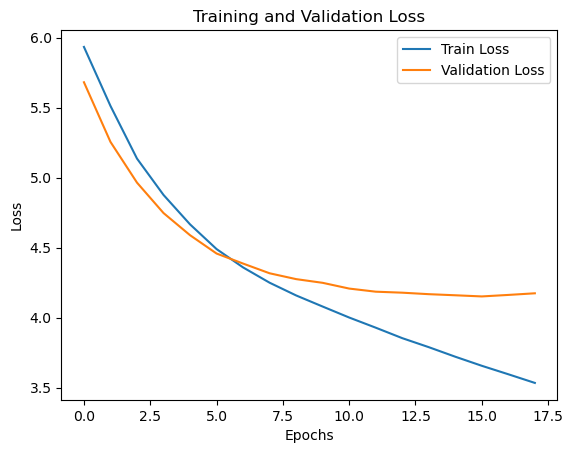

In [42]:
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

# 10. Inference Modeling
- 지금까지는 정답 문장(또는 Decoder의 input)이 존재하는 데이터에 대해서 학습을 진행
- 반면 test data와 같이 정답 문장이 없는 데이터(또는 Decoder의 input이 없는)에 대해서는 별도의 Generate model 만들어야 함

In [48]:
src_index_to_word = {idx: word for word, idx in src_vocab.items()} # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_vocab # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = {idx: word for word, idx in tar_vocab.items()} # 요약 단어 집합에서 정수 -> 단어를 얻음

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
decoder.to(device)

# 인코더 설계
def encode_input(encoder, input_seq):
    encoder_outputs, hidden, cell = encoder(input_seq)
    return encoder_outputs, hidden, cell

# 이전 시점의 상태들을 저장하는 텐서
num_layers = 3  # 디코더 LSTM 레이어 개수 (설정에 맞춰 조정)
batch_size = 1

decoder_state_input_h = torch.zeros((num_layers, batch_size, hidden_size), dtype=torch.float, device=device)
decoder_state_input_c = torch.zeros((num_layers, batch_size, hidden_size), dtype=torch.float, device=device)
decoder_input = torch.zeros((batch_size, 1), dtype=torch.long, device=device)

dec_emb2 = decoder.embedding(decoder_input)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder(decoder_input, decoder_state_input_h, decoder_state_input_c)

In [49]:
class DecoderWithAttention(nn.Module):
    def __init__(self, decoder, attention, hidden_size, vocab_size):
        super(DecoderWithAttention, self).__init__()
        self.decoder = decoder  # 기존 디코더
        self.attention = attention  # 어텐션 레이어
        self.concat = nn.Linear(hidden_size * 2, hidden_size)  # 어텐션 결합 레이어
        self.output_layer = nn.Linear(hidden_size, vocab_size)  # 최종 출력층
        self.softmax = nn.Softmax(dim=-1)  # 소프트맥스

    def forward(self, decoder_inputs, decoder_hidden_state, decoder_state_h, decoder_state_c):
        # 디코더 실행
        decoder_outputs, state_h, state_c = self.decoder(decoder_inputs, decoder_state_h, decoder_state_c)

        # 어텐션 적용
        attn_out = self.attention(decoder_outputs, decoder_hidden_state)

        # 어텐션과 디코더 출력 결합
        decoder_concat_output = torch.cat((decoder_outputs, attn_out), dim=-1)
        decoder_concat_output = torch.tanh(self.concat(decoder_concat_output))

        # 최종 출력층 적용
        decoder_outputs2 = self.softmax(self.output_layer(decoder_concat_output))

        return decoder_outputs2, state_h, state_c

# 기존 Attention 클래스 사용
attention_layer = Attention_dot(hidden_size)

# 디코더 모델 생성
decoder_model = DecoderWithAttention(decoder, attention_layer, hidden_size, tar_vocab_size).to(device)

In [50]:
def decode_sequence(input_seq, encoder, decoder, tar_word_to_index, tar_index_to_word,
                    text_max_len, summary_max_len, device):
    input_seq = torch.tensor(input_seq, dtype=torch.long, device=device)

    with torch.no_grad():
        e_out, e_h, e_c = encoder(input_seq)

    # <SOS> 토큰
    target_seq = torch.zeros((1, 1), dtype=torch.long, device=device)
    target_seq[0, 0] = tar_word_to_index['sos']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        with torch.no_grad():
            # 여기서 Attention 포함 디코더를 사용
            output_tokens, h, c = decoder(target_seq, e_out, e_h, e_c)

        sampled_token_index = torch.argmax(output_tokens[0, -1, :]).item()
        sampled_token = tar_index_to_word[sampled_token_index]

        if sampled_token != 'eos':
            decoded_sentence += ' ' + sampled_token

        if sampled_token == 'eos' or len(decoded_sentence.split()) >= (summary_max_len - 1):
            stop_condition = True

        target_seq[0, 0] = sampled_token_index
        e_h, e_c = h, c

    return decoded_sentence


# 11. Model Testing
- 위 모델에서 생성된 값은 숫자일거다
- text로 변환하여 출력하는 것이 보기 좋음
- 또한 Padding이나 special Token도 제거해서 보여주는 걸로

In [51]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        key = int(i.item())  # PyTorch Tensor → int 변환
        if key != 0:  # 패딩(0) 제외
            temp = temp + src_index_to_word.get(key, "<UNK>") + ' '  # 안전한 조회
    return temp.strip()

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        key = int(i.item())  # PyTorch Tensor → int 변환
        # <SOS>와 <EOS>가 전처리 중에 특수기호 삭제되고, 소문자로 변해서 아래 처럼 - 생각을 못했다.
        if key != 0 and key != tar_word_to_index['sos'] and key != tar_word_to_index['eos']:
            temp = temp + tar_index_to_word.get(key, "<UNK>") + ' '  # 안전한 조회
    return temp.strip()  # 양쪽 공백 제거


In [52]:
%%time
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    input_seq = torch.tensor(encoder_input_test[i], dtype=torch.long, device=device).unsqueeze(0)
    print("예측 요약 :", decode_sequence(input_seq, encoder, decoder_model, tar_word_to_index, tar_index_to_word, text_max_len, summary_max_len, device))
    print("\n")

원문 : husband loves even run store night buy couple packages ordering large volume would economical asked stop getting mail much likes patties never gets tired arrive broken degree worth even discounted price
실제 요약 : if only they were not
예측 요약 :  itit chocolatey can shame shame terrific farthe


원문 : got snacks searching veggie straws looked tasty however care consistency since called crisps assumed would crunchy like chips instead dissolve mouth kind like party mints cancelled subscription gave packages someone else try lesson learned
실제 요약 : <UNK>
예측 요약 :  goodtastes can goodtastes preserves shame goodtastes badnot


원문 : bought bulk tea help blood pressure issues something could throw pitcher heat fix sort like sun tea without sun wonderful <UNK> brewing large basket black filter super happy permanently keeping big pitcher fridge one would ever guess health food tea esp great liquid stevia bet could wean kids koolaid since good pretty colorful red highly recommend inexpensive withou

<timed exec>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
/tmp/ipykernel_130/2125405884.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq, dtype=torch.long, device=device)


예측 요약 :  itit working packaged choking gum gum maker


원문 : <UNK> noticed black area top appeared <UNK> course afraid eat fruit threw away waiting response native forest <UNK> type metal harmful one would expect went effort certified organic would use safe canning post <UNK> response
실제 요약 : inside of can
예측 요약 :  fudge can diets inconsistent here goodtastes farthe


원문 : cat crazy snapper shrimp varieties loves yellow <UNK> tuna think helps company use wheat gluten
실제 요약 : my cat only eats this
예측 요약 :  greatgreat bug favoritefavorite packaged favoritefavorite truffle school


원문 : two smaller dogs absolutely love tug jug many uses product training feeding tug play fetch etc incredible considering low price ingenious design <UNK> sure use smaller treats dog get hang adjust size make challenging trust put little time showing dog works easily become favorite toy best
실제 요약 : the best dog toy ever
예측 요약 :  goodtastes can goodtastes preserves stash every may


원문 : ordered oz crab cakes u

### 10과 11과정 중요한 포인트가 코드에서 빠져있음
- DecoderWithAttention class 만들었음에도, 추론하고 생성할때 막상 쓰질 않음

In [53]:
src_index_to_word = {idx: word for word, idx in src_vocab.items()} # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_vocab # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = {idx: word for word, idx in tar_vocab.items()} # 요약 단어 집합에서 정수 -> 단어를 얻음

In [80]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
decoder.to(device)

# 인코더 설계
def encode_input(encoder, input_seq):
    encoder_outputs, hidden, cell = encoder(input_seq)
    return encoder_outputs, hidden, cell

# 이전 시점의 상태들을 저장하는 텐서
num_layers = 3  # 디코더 LSTM 레이어 개수 (설정에 맞춰 조정)
batch_size = 1

decoder_state_input_h = torch.zeros((num_layers, batch_size, hidden_size), dtype=torch.float, device=device)
decoder_state_input_c = torch.zeros((num_layers, batch_size, hidden_size), dtype=torch.float, device=device)
decoder_input = torch.zeros((batch_size, 1), dtype=torch.long, device=device)

dec_emb2 = decoder.embedding(decoder_input)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder(decoder_input, decoder_state_input_h, decoder_state_input_c)



In [81]:
class DecoderWithAttention(nn.Module):
    def __init__(self, decoder, attention, hidden_size, vocab_size):
        super(DecoderWithAttention, self).__init__()
        self.decoder = decoder  # 기존 디코더
        self.attention = attention  # 어텐션 레이어
        self.concat = nn.Linear(hidden_size * 2, hidden_size)  # 어텐션 결합 레이어
        self.output_layer = nn.Linear(hidden_size, vocab_size)  # 최종 출력층
        self.softmax = nn.Softmax(dim=-1)  # 소프트맥스

    def forward(self, decoder_inputs, decoder_hidden_state, decoder_state_h, decoder_state_c):
        # 디코더 실행
        decoder_outputs, state_h, state_c = self.decoder(decoder_inputs, decoder_state_h, decoder_state_c)

        # 어텐션 적용
        attn_out = self.attention(decoder_outputs, decoder_hidden_state)

        # 어텐션과 디코더 출력 결합
        decoder_concat_output = torch.cat((decoder_outputs, attn_out), dim=-1)
        decoder_concat_output = torch.tanh(self.concat(decoder_concat_output))

        # 최종 출력층 적용
        decoder_outputs2 = self.softmax(self.output_layer(decoder_concat_output))

        return decoder_outputs2, state_h, state_c

# 기존 Attention 클래스 사용
attention_layer = Attention_dot(hidden_size)

# 디코더 모델 생성
decoder_model = DecoderWithAttention(decoder, attention_layer, hidden_size, tar_vocab_size)

In [99]:
def decode_sequence(input_seq, encoder, decoder, tar_word_to_index, tar_index_to_word, text_max_len, summary_max_len, device):
    # 입력을 PyTorch Tensor로 변환
    input_seq = torch.tensor(input_seq, dtype=torch.long, device=device)

    # 인코더 실행하여 초기 상태(hidden, cell) 얻기
    with torch.no_grad():
        e_out, e_h, e_c = encoder(input_seq)

    e_out = e_out.repeat(1, text_max_len, 1)  # 차원 조정 (np.tile 대신 repeat 사용)

    # <SOS>에 해당하는 토큰 생성
    target_seq = torch.zeros((1, 1), dtype=torch.long, device=device)
    target_seq[0, 0] = tar_word_to_index['sos']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # 디코더 실행
        with torch.no_grad():
            output_tokens, h, c = decoder(target_seq, e_h, e_c)

        # 가장 높은 확률을 가진 단어 선택
        sampled_token_index = torch.argmax(output_tokens[0, -1, :]).item()
        sampled_token = tar_index_to_word[sampled_token_index]

        if sampled_token != 'eos':
            decoded_sentence += ' ' + sampled_token

        # 종료 조건: <eos>에 도달하거나 최대 길이를 초과하면 중단
        if sampled_token == 'eos' or len(decoded_sentence.split()) >= (summary_max_len - 1):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = torch.zeros((1, 1), dtype=torch.long, device=device)
        target_seq[0, 0] = sampled_token_index

        # 상태 업데이트
        e_h, e_c = h, c

    return decoded_sentence

In [102]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        key = int(i.item())  # PyTorch Tensor → int 변환
        if key != 0:  # 패딩(0) 제외
            temp = temp + src_index_to_word.get(key, "<UNK>") + ' '  # 안전한 조회
    return temp.strip()

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        key = int(i.item())  # PyTorch Tensor → int 변환
        # <SOS>와 <EOS>가 전처리 중에 특수기호 삭제되고, 소문자로 변해서 아래 처럼 - 생각을 못했다.
        if key != 0 and key != tar_word_to_index['sos'] and key != tar_word_to_index['eos']:
            temp = temp + tar_index_to_word.get(key, "<UNK>") + ' '  # 안전한 조회
    return temp.strip()  # 양쪽 공백 제거


In [103]:
%%time
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    input_seq = torch.tensor(encoder_input_test[i], dtype=torch.long, device=device).unsqueeze(0)
    print("예측 요약 :", decode_sequence(input_seq, encoder, decoder, tar_word_to_index, tar_index_to_word, text_max_len, summary_max_len, device))
    print("\n")

원문 : scooby snacks fruit gushers favorite two fruit snacks greens blues awesome <UNK> go box time vitamin help immune system contain fat sugar content could concern also contain minor amount pectin common ingredient throat lozenges somewhat helpful combined vitamin got cold sore throat
실제 요약 : best fruit snacks out
예측 요약 :  rice will to energy in energy soup


원문 : like lapsang souchong tea like buy loose tea make pot rather cup time brand right wish smoky opinion much like ordinary black tea though usually sweeten black tea well spoonful honey
실제 요약 : <UNK>
예측 요약 :  rice will to energy in energy than


원문 : bought joke give friend beer <UNK> dog dog really care one way tried give dog also turned nose sure appears salty <UNK> smell could reason turned doggy noses however cute put <UNK> pictures dogs plastic bottles looking like hung along master
실제 요약 : cute
예측 요약 :  in delicious will to energy in bit


원문 : third ingredient potassium citrate fourth potassium bicarbonate natural ingred

<timed exec>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
/tmp/ipykernel_1706/567910264.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq, dtype=torch.long, device=device)


예측 요약 :  rice in delicious will well energy bit


원문 : much say really quality pepper tastes fine grit foreign bodies definitely pungent black pepper
실제 요약 : good quality
예측 요약 :  rice in delicious will cereal energy than


원문 : like taco bell anxious try sauce ok also typical lot sauces flavor good consistency creamy hot would expected taco bell associated healthy food surprisingly fat serving calorie count high calories fat looking hot less fat lot better alternatives market
실제 요약 : good flavor but does not stand
예측 요약 :  rice will cereal will cereal energy than


원문 : enjoyed trying product flavor sweet would expected surprise since uses natural flavorings size small convenient quick pick ideal quenching <UNK> much enjoyed probably would switch current staple premium sodas beverages
실제 요약 : pretty good stuff but not enough to
예측 요약 :  rice in delicious will cereal energy than


원문 : shampoo white instead blue smelly like cleaned hair made scalp feel better container fit corner tub s

# 12. Extractive Summarization 해보기

In [55]:
#!pip install summa
# summa : 추출적 요약을 위한 모듈인 summarize를 제공

In [56]:
import requests
from summa.summarizer import summarize

In [57]:
url = "https://raw.githubusercontent.com/modulabs/Aiffel_Resources/main/matrix_synopsis.txt"
text = requests.get(url, timeout=10).text
print(text[:1500])

In 1999, in an unnamed city, Computer programmer Thomas Anderson (Keanu Reeves) is secretly a hacker known as "Neo". He is restless, eager and driven to learn the meaning of cryptic references to the "Matrix" appearing on his computer. A woman named Trinity is observing Neo, and she does so knowing that Morpheus believes that Neo is "the One".

During one of her forays, Trinity is tracked down by the local police to her hotel room. Outside the hotel a car drives up and three agents appear in neatly pressed black suits. They are Agent Smith (Hugo Weaving), Agent Brown (Paul Goddard), and Agent Jones (Robert Taylor). Trinity calls Morpheus and says that her line was tracked and Morpheus orders her to find another exit. Trinity easily defeats the six policemen sent to apprehend her, using fighting and evasion techniques that seem to defy gravity.

A fierce rooftop chase ensues with Trinity and an Agent leaping impossibly from one building to the next, astonishing the policemen left behind

**Summa의 summarize()의 인자**
- text (str) : 요약할 테스트.
- ratio (float, optional) - 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
- words (int or None, optional) - 출력에 포함할 단어 수. 만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
- split (bool, optional) - True면 문장 list / False는 조인(join)된 문자열을 반환

또한 문장 토큰화도 내부적으로 자동으로 진행 됨

In [58]:
print('Summary:')
print(summarize(text, ratio=0.01))

Summary:
Morpheus and Trinity use a telephone to exit the Matrix, but Neo is ambushed by Agent Smith.


In [59]:
print('Summary:')
print(summarize(text, ratio=0.01, split=True))

Summary:
['Morpheus and Trinity use a telephone to exit the Matrix, but Neo is ambushed by Agent Smith.']


In [60]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Morpheus and Neo are walking down a standard city street in what appears to be the Matrix.
Morpheus and Trinity use a telephone to exit the Matrix, but Neo is ambushed by Agent Smith.
